<h1 align='center'><b>Введение в нейронные сети<b></h1>

<h1 align='left'>Урок 1. Основы обучения нейронных сетей</h1>

<h2 align='center'>Домашняя работа</h2>

Практическое задание:
<ol>
    <li>Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох, можно изменять число слоёв).
    <li>Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?
</ol>


In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

### Шаг 1. Определение функций, которые понадобяться для обучения

In [40]:
import numpy as np
import pandas as pd

class Neural_Network:
    
    def __init__(self, neuron_numb, learning_rate, n_estimators, seed=42):
        
        self.neuron_numb = neuron_numb # число нейронов скрытого слоя
        self.learning_rate = learning_rate # скорость обучения (learning rate)
        self.n_estimators = n_estimators # количество эпох
        self.seed = seed
        
        self.w0 = None # для входного слоя
        self.w1 = None # для внутреннего слоя
    
    # сигмоида
    @staticmethod
    def sigmoid(x): # x = sigmoid
        return 1/(1+np.exp(-x))
    
    # производная сигмоиды
    @staticmethod
    def sigmoid_deriv(x): # x = сигмоида
        return (x)*(1 - (x))
    
    def fit(self, X_train, y_train):
        
        np.random.seed(self.seed)
        
        self.w0 = 2*np.random.random((X_train.shape[1], self.neuron_numb)) - 1 # для входного слоя
        self.w1 = 2*np.random.random((self.neuron_numb, y_train.shape[1])) - 1 # для внутреннего слоя
        
        # процесс обучения
        for i in range(self.n_estimators):

            # прямое распространение(feed forward)
            layer0 = X_train
            layer1 = self.sigmoid(np.dot(layer0, self.w0))
            layer2 = self.sigmoid(np.dot(layer1, self.w1))

            # обратное распространение(back propagation) с использованием градиентного спуска
            layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь
            layer2_delta = layer2_error * self.sigmoid_deriv(layer2) 
    
            layer1_error = layer2_delta.dot(self.w1.T)
            layer1_delta = layer1_error * self.sigmoid_deriv(layer1)
            # коррекция
            self.w1 += layer1.T.dot(layer2_delta) * self.learning_rate
            self.w0 += layer0.T.dot(layer1_delta) * self.learning_rate
    
    def predict(self, X_test):
        
        layer0 = X_test
        layer1 = self.sigmoid(np.dot(layer0, self.w0))
        layer2 = self.sigmoid(np.dot(layer1, self.w1))
        
        return layer2 

### Шаг 2. Подготовка тренировочных данных

In [41]:
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [42]:
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
# получения данных из csv файла
iris_data = pd.read_csv("Iris.csv")
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


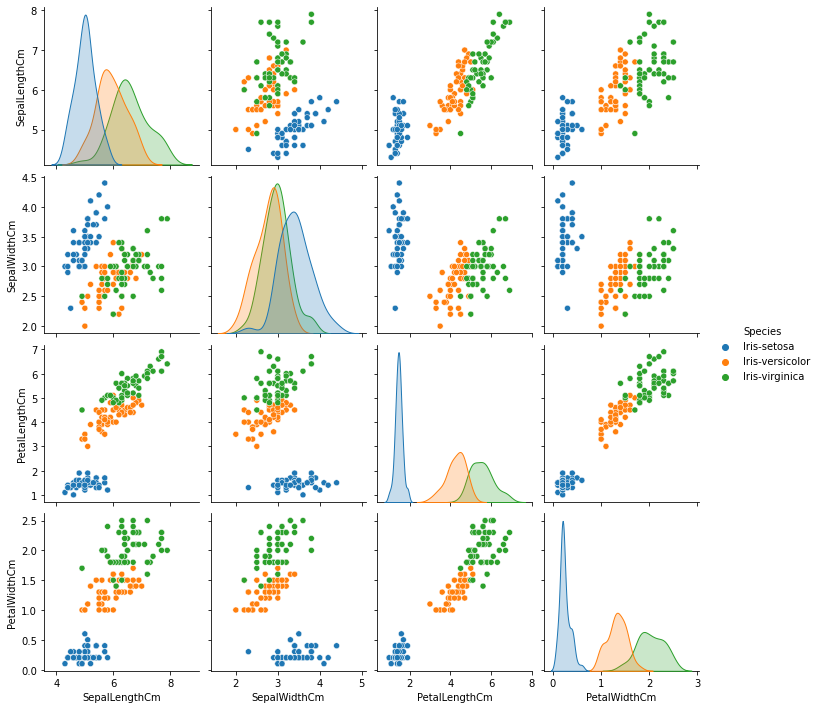

In [43]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show()

In [44]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
iris_data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [45]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
x[:5]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ]])

In [46]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [47]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train[:5]

array([[0.73446047, 0.37367287, 0.5411814 , 0.16750853],
       [0.70953708, 0.28008043, 0.61617694, 0.1960563 ],
       [0.70631892, 0.37838513, 0.5675777 , 0.18919257],
       [0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.71486543, 0.25995106, 0.62202576, 0.18567933]])

### Шаг 3. Обученние нейронной сети

In [48]:
# Пусть:
NEURON_NUMB = 5
LEARNING_RATE = 0.05
N_ESTIMATORS = 10000
SEED = 42

In [49]:
NN = Neural_Network(neuron_numb = NEURON_NUMB, learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = SEED)
NN.fit(X_train, y_train)

#### Предсказание нейронной сети и метрика

In [50]:
predict = NN.predict(X_test)
error = np.mean(np.abs(predict - y_test))
accuracy = 1 - error
accuracy

0.9597836191419529

#### Подбор гиперпараметров

In [51]:
def nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = 5, learning_rate = 0.05, n_estimators = 10000, seed = 42):
    NN = Neural_Network(neuron_numb = neuron_numb, learning_rate = learning_rate, n_estimators = n_estimators, seed = seed)
    NN.fit(X_train, y_train)
    predict = NN.predict(X_test)
    error = np.mean(np.abs(predict - y_test))
    accuracy = 1 - error
    
    return accuracy

#### NEURON_NUMB

In [52]:
%%time

neuron_numb_list = [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000]

accuracy_neuron_numb = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = i, learning_rate = LEARNING_RATE, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in neuron_numb_list]

list(zip(accuracy_neuron_numb, neuron_numb_list))

CPU times: user 1min 22s, sys: 1.28 s, total: 1min 23s
Wall time: 23.1 s


[(0.641790705681216, 1),
 (0.8532162638087488, 2),
 (0.9591532524436585, 3),
 (0.9597836191419529, 5),
 (0.9600874619345544, 10),
 (0.9609290335148318, 20),
 (0.9613974624388191, 30),
 (0.960974817180595, 50),
 (0.9607709714659952, 100),
 (0.6666666481667352, 200),
 (0.6666666666666422, 300),
 (0.5866666720829863, 500),
 (0.6666666661033593, 1000)]

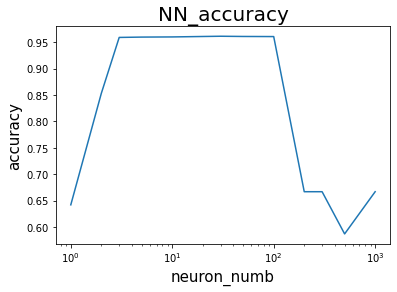

In [53]:
plt.plot(neuron_numb_list, accuracy_neuron_numb)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neuron_numb', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [54]:
max(zip(accuracy_neuron_numb, neuron_numb_list), key=lambda i : i[0])

(0.9613974624388191, 30)

Метрика растёт, до neuron_numb = 3, дальше медленно, до 100, дальше резкое падение.

#### LEARNING_RATE

In [55]:
%%time

learning_rate_list = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 1, 2, 3, 5 ,10]

accuracy_learning_rate = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, learning_rate = i, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in learning_rate_list]

list(zip(accuracy_learning_rate, learning_rate_list))

CPU times: user 4.96 s, sys: 4 ms, total: 4.96 s
Wall time: 4.96 s


[(0.7620278989476669, 0.001),
 (0.7990231409239197, 0.002),
 (0.8397273266811723, 0.003),
 (0.9093480832887801, 0.005),
 (0.9434008004964916, 0.01),
 (0.9541329542313529, 0.02),
 (0.9572585607096473, 0.03),
 (0.9597836191419529, 0.05),
 (0.9622918618968742, 0.1),
 (0.9696945544456909, 0.2),
 (0.96144231556912, 0.3),
 (0.9734710517078143, 0.5),
 (0.9798639435119809, 1),
 (0.7104691189857845, 2),
 (0.6899845808440204, 3),
 (0.6666666654439599, 5),
 (0.666666666666656, 10)]

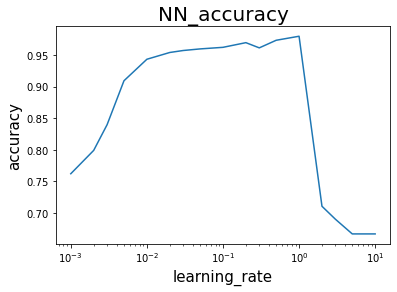

In [56]:
plt.plot(learning_rate_list, accuracy_learning_rate)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('learning_rate', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [57]:
max(zip(accuracy_learning_rate, learning_rate_list), key=lambda i : i[0])

(0.9798639435119809, 1)

Видно, что метрика быстро растёт, до learning_rate = 0.02, дальше медленно, до learning_rate = 0.5, дальше резкое падение.
learning_rate = 1 хоть и показал лучшую метрику, но он выглдядит очень нестабильным, так как тогда мы возможно проскочем условно глобальный минимум.

#### N_ESTIMATORS

In [58]:
%%time

n_estimators_list = [100, 200, 300, 500, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 50000, 100000, 200000, 300000, 500000,
                    1000000]

accuracy_n_estimators = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                                      learning_rate = LEARNING_RATE, n_estimators = i, seed = SEED) for i in n_estimators_list]

list(zip(accuracy_n_estimators, n_estimators_list))

CPU times: user 1min 4s, sys: 20 ms, total: 1min 5s
Wall time: 1min 4s


[(0.7052248785324821, 100),
 (0.7619648772347983, 200),
 (0.7822427614236707, 300),
 (0.8173623439075464, 500),
 (0.9093264444880963, 1000),
 (0.943393689908792, 2000),
 (0.9508203269291502, 3000),
 (0.956019394488726, 5000),
 (0.9597836191419529, 10000),
 (0.9622662942677362, 20000),
 (0.9638217637939026, 30000),
 (0.9679587579591953, 50000),
 (0.9787461339794764, 100000),
 (0.9852596020032598, 200000),
 (0.9895918407147924, 300000),
 (0.9912031025021386, 500000),
 (0.9919060389893702, 1000000)]

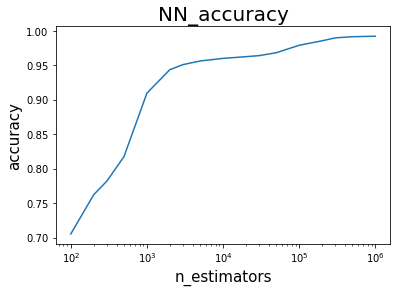

In [59]:
plt.plot(n_estimators_list, accuracy_n_estimators)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('n_estimators', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [60]:
max(zip(accuracy_n_estimators, n_estimators_list), key=lambda i : i[0])

(0.9919060389893702, 1000000)

Метрика быстро растёт, до n_estimators = 2000, дальше медленно, до конца.

#### SEED

In [61]:
%%time

seed_list = list(range(21))

accuracy_seed = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                            learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = i) for i in seed_list]

list(zip(accuracy_seed, seed_list))

CPU times: user 8.18 s, sys: 8 ms, total: 8.19 s
Wall time: 8.2 s


[(0.9605325244517579, 0),
 (0.9594221816938864, 1),
 (0.960055183249819, 2),
 (0.9598680993047041, 3),
 (0.9601125672367307, 4),
 (0.9600648895232059, 5),
 (0.9593624201270241, 6),
 (0.959879620819883, 7),
 (0.9600450859327376, 8),
 (0.9595672493742948, 9),
 (0.9590162176403408, 10),
 (0.9597911948078202, 11),
 (0.9585941331005191, 12),
 (0.9595878492149175, 13),
 (0.9589171458429627, 14),
 (0.9596428723730608, 15),
 (0.9596340723403103, 16),
 (0.9598623220925755, 17),
 (0.959038205370831, 18),
 (0.9601333160577986, 19),
 (0.9581987476293637, 20)]

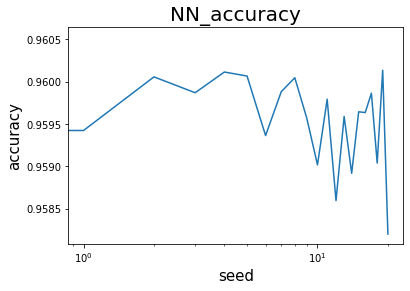

In [62]:
plt.plot(seed_list, accuracy_seed)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('seed', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

В среднем метрика очень слабо зависит от этого параметра.  
Но если бы наше решение было не стабильным, например как при learning_rate = 1, то тогда:

In [67]:
%%time

seed_list = list(range(21))

accuracy_seed = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = NEURON_NUMB, 
                            learning_rate = 1, n_estimators = N_ESTIMATORS, seed = i) for i in seed_list]

list(zip(accuracy_seed, seed_list))

CPU times: user 6.18 s, sys: 8.01 ms, total: 6.18 s
Wall time: 6.17 s


[(0.9732461154761319, 0),
 (0.9687064159558771, 1),
 (0.986988857788596, 2),
 (0.9938044134838903, 3),
 (0.969289403364112, 4),
 (0.965446050671834, 5),
 (0.9556904865760484, 6),
 (0.9451104530439619, 7),
 (0.9768272406654352, 8),
 (0.9696383417557323, 9),
 (0.9628858866928646, 10),
 (0.9712055613144533, 11),
 (0.9957808324234495, 12),
 (0.97592976303388, 13),
 (0.9611259970025022, 14),
 (0.8703124243336454, 15),
 (0.9665496713330212, 16),
 (0.9733760683380389, 17),
 (0.956534487007131, 18),
 (0.970397282867813, 19),
 (0.9629507947545155, 20)]

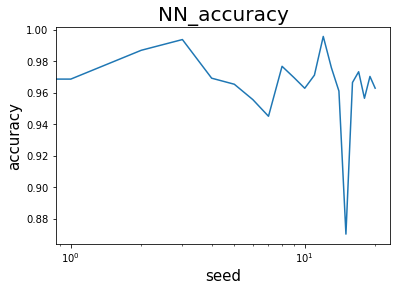

In [68]:
plt.plot(seed_list, accuracy_seed)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('seed', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [69]:
max(zip(accuracy_seed, seed_list), key=lambda i : i[0])

(0.9957808324234495, 12)

### Модель с лучшими гиперпараметрами

In [70]:
# Возьмём наше неустойчивое решение learning_rate = 1, оно показывает лучшую метрику при seed = 12, 
# теперь возьмём очень много эпох n_estimators = 50000, тогда:
LEARNING_RATE = 1
# N_ESTIMATORS = 50000
SEED = 12

In [71]:
%%time

# Остаётся подобрать neuron_numb
neuron_numb_list = list(range(50))

accuracy_neuron_numb = [nn_get_metric(X_train, y_train, X_test, y_test, neuron_numb = i, learning_rate = LEARNING_RATE, 
                                      n_estimators = N_ESTIMATORS, seed = SEED) for i in neuron_numb_list]

list(zip(accuracy_neuron_numb, neuron_numb_list))

CPU times: user 23.5 s, sys: 12 ms, total: 23.5 s
Wall time: 23.5 s


[(0.5, 0),
 (0.6678073119742418, 1),
 (0.87331525298383, 2),
 (0.9424423249552845, 3),
 (0.9537922182141735, 4),
 (0.9957808324234495, 5),
 (0.9941848967631208, 6),
 (0.9784555409588355, 7),
 (0.9843720212644111, 8),
 (0.9954338409567698, 9),
 (0.9871015025819074, 10),
 (0.9924898487809843, 11),
 (0.9673018430943834, 12),
 (0.9720579837044873, 13),
 (0.9851643211993838, 14),
 (0.9903376465292889, 15),
 (0.9798199947688748, 16),
 (0.9642438857197981, 17),
 (0.6666666658406257, 18),
 (0.9794832593700614, 19),
 (0.6666666534925187, 20),
 (0.9834980932602864, 21),
 (0.9819871597706107, 22),
 (0.6666666666663078, 23),
 (0.986747638997776, 24),
 (0.9656274266768938, 25),
 (0.9573274485500016, 26),
 (0.6666666648866253, 27),
 (0.9826294753194953, 28),
 (0.6666666666418212, 29),
 (0.6666666666666667, 30),
 (0.6666666666666667, 31),
 (0.6666666666666753, 32),
 (0.5333333337094648, 33),
 (0.5466666668654718, 34),
 (0.5866666666688425, 35),
 (0.5333333333524539, 36),
 (0.6666666666666663, 37),
 (

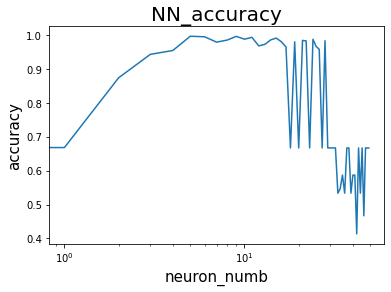

In [72]:
plt.plot(neuron_numb_list, accuracy_neuron_numb)
plt.title('NN_accuracy', fontsize=20)
plt.xlabel('neuron_numb', fontsize=15)
plt.xscale('log')
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [73]:
max(zip(accuracy_neuron_numb, neuron_numb_list), key=lambda i : i[0])

(0.9957808324234495, 5)

График получился интересным, после neuron_numb = 17, решение становится очень не стабильным. Лучшее решение, при neuron_numb = 5.

In [74]:
NEURON_NUMB = 5
N_ESTIMATORS = 1000000

In [75]:
%%time

NN = Neural_Network(neuron_numb = NEURON_NUMB, learning_rate = LEARNING_RATE, n_estimators = N_ESTIMATORS, seed = SEED)
NN.fit(X_train, y_train)

CPU times: user 29.2 s, sys: 32 ms, total: 29.3 s
Wall time: 29.2 s


In [76]:
predict = NN.predict(X_test)
error = np.mean(np.abs(predict - y_test))
best_accuracy = 1 - error
best_accuracy

0.9987273531800199

In [77]:
best_accuracy, accuracy

(0.9987273531800199, 0.9597836191419529)

In [78]:
best_accuracy - accuracy

0.03894373403806706

Мы улучшили нашу метрику на 0.03894 или на 3.89%